# Hemnet basic analysis

This notebook runs a few sanity checks and simple aggregations.

Prereqs:
- Set `DATABASE_URL` in your environment or in `.env`.
- Install pandas if needed: `pip install pandas`.


In [13]:
import os
from pathlib import Path

import pandas as pd
from sqlalchemy import create_engine

def load_env(path: Path) -> None:
    if not path.exists():
        return
    for line in path.read_text().splitlines():
        line = line.strip()
        if not line or line.startswith('#'):
            continue
        key, _, value = line.partition('=')
        if key and key not in os.environ:
            os.environ[key.strip()] = value.strip().strip(chr(34)).strip(chr(39))

load_env(Path('.env'))
database_url = os.getenv('DATABASE_URL')
if not database_url:
    raise RuntimeError('Missing DATABASE_URL')

engine = create_engine(database_url)


In [2]:
query = '''
SELECT
  hemnet_id,
  price,
  asked_price,
  square_meters,
  rooms,
  monthly_fee,
  cost_per_year,
  year,
  type,
  address,
  geographic_area,
  municipality_name,
  region_name,
  broker_name,
  broker_firm,
  published_at,
  collected_at
FROM hemnet_items
WHERE hemnet_id IS NOT NULL
'''
df = pd.read_sql_query(query, engine)
df.head()


hemnet_id      price  asked_price  square_meters  rooms  monthly_fee  \
0   21654507  5995000.0    5995000.0          152.0    6.0       6481.0   
1   21497365  2395000.0    2395000.0           48.0    2.0       3308.0   
2   21664316  4895000.0    4895000.0           79.0    3.0       4996.0   
3   21654034  7495000.0    7495000.0          201.0    7.0          NaN   
4   21576036  8795000.0    8795000.0          159.0    6.0       5957.0   

   cost_per_year  year                type               address  \
0        30000.0  2025  Par-/kedje-/radhus          Fyrgränd 11C   
1         9600.0  2025            Lägenhet         Fyrgränd 9-22   
2         6600.0  2003            Lägenhet  Skogsslingan 4, 2tr.   
3        54119.0  2005               Villa      Sibyllavägen 25A   
4        43478.0  2026              Radhus     Edelcrantz väg 15   

       geographic_area municipality_name     region_name         broker_name  \
0              Högmora   Huddinge kommun  Stockholms län        David Krantz   
1              Högmora   Huddinge kommun  Stockholms län        David Krantz   
2       Charlottenberg  Danderyds kommun  Stockholms län  Magdalena Örtegren   
3              Glömsta   Huddinge kommun  Stockholms län    Henrik Holmqvist   
4  Nacka - Saltsjö Boo      Nacka kommun  Stockholms län         Andreas Tid   

                      broker_firm published_at collected_at  
0  SkandiaMäklarna Botkyrka/Salem         None   2026-01-21  
1  SkandiaMäklarna Botkyrka/Salem         None   2026-01-21  
2        Fastighetsbyrån Danderyd         None   2026-01-21  
3        Bjurfors Huddinge/Älvsjö         None   2026-01-21  
4               Tradition Mäkleri         None   2026-01-21

In [14]:
query = '''
SELECT *
FROM hemnet_items
WHERE hemnet_id IS NOT NULL
'''
df = pd.read_sql_query(query, engine)
df.head()

id  hemnet_id                                                url  \
0   1   21654507  https://www.hemnet.se/bostad/radhus-6rum-hogmo...   
1   2   21497365  https://www.hemnet.se/bostad/lagenhet-2rum-hog...   
2   3   21664316  https://www.hemnet.se/bostad/lagenhet-3rum-cha...   
3   4   21654034  https://www.hemnet.se/bostad/villa-7rum-glomst...   
4   5   21576036  https://www.hemnet.se/bostad/radhus-6rum-nacka...   

                                         listing_url         broker_name  \
0  https://www.hemnet.se/bostad/radhus-6rum-hogmo...        David Krantz   
1  https://www.hemnet.se/bostad/lagenhet-2rum-hog...        David Krantz   
2  https://www.hemnet.se/bostad/lagenhet-3rum-cha...  Magdalena Örtegren   
3  https://www.hemnet.se/bostad/villa-7rum-glomst...    Henrik Holmqvist   
4  https://www.hemnet.se/bostad/radhus-6rum-nacka...         Andreas Tid   

     broker_phone                           broker_email  \
0     073-3530343        david.krantz@skandiamaklarna.se   
1     073-3530343        david.krantz@skandiamaklarna.se   
2   0705-74 77 06  magdalena.ortegren@fastighetsbyran.se   
3   0723-63 68 78           henrik.holmqvist@bjurfors.se   
4  073-374 81 64‬               andreas.tid@tradition.se   

                      broker_firm broker_firm_phone sold_date  ...  \
0  SkandiaMäklarna Botkyrka/Salem     08-530 341 00      None  ...   
1  SkandiaMäklarna Botkyrka/Salem     08-530 341 00      None  ...   
2        Fastighetsbyrån Danderyd     08-585 702 00      None  ...   
3        Bjurfors Huddinge/Älvsjö      08-711 33 00      None  ...   
4               Tradition Mäkleri              None      None  ...   

                                         raw_listing  \
0  {'id': '21654507', 'fee': {'amount': 6481, 'fo...   
1  {'id': '21497365', 'fee': {'amount': 3308, 'fo...   
2  {'id': '21664316', 'fee': {'amount': 4996, 'fo...   
3  {'id': '21654034', 'fee': None, 'area': 'Glöms...   
4  {'id': '21576036', 'fee': {'amount': 5957, 'fo...   

                                    raw_apollo_state  \
0  {'ROOT_QUERY': {'__typename': 'Query', 'listin...   
1  {'ROOT_QUERY': {'__typename': 'Query', 'listin...   
2  {'Broker:652': {'id': '652', 'name': 'Magdalen...   
3  {'ROOT_QUERY': {'__typename': 'Query', 'listin...   
4  {'ROOT_QUERY': {'__typename': 'Query', 'listin...   

                                          broker_raw  \
0  {'id': '4758', 'name': 'David Krantz', 'slug':...   
1  {'id': '4758', 'name': 'David Krantz', 'slug':...   
2  {'id': '652', 'name': 'Magdalena Örtegren', 's...   
3  {'id': '20931', 'name': 'Henrik Holmqvist', 's...   
4  {'id': '25145', 'name': 'Andreas Tid', 'slug':...   

                                   broker_agency_raw  \
0  {'id': '28067', 'city': 'Huddinge', 'name': 'S...   
1  {'id': '28067', 'city': 'Huddinge', 'name': 'S...   
2  {'id': '1016', 'city': 'Danderyd', 'name': 'Fa...   
3  {'id': '708291', 'city': 'Huddinge', 'name': '...   
4  {'id': '739151', 'city': 'Stockholm', 'name': ...   

                                      main_image_url  \
0  https://bilder.hemnet.se/images/itemgallery_cu...   
1  https://bilder.hemnet.se/images/itemgallery_cu...   
2  https://bilder.hemnet.se/images/itemgallery_cu...   
3  https://bilder.hemnet.se/images/itemgallery_cu...   
4  https://bilder.hemnet.se/images/itemgallery_cu...   

                                    main_image_bytes  main_image_mime  \
0  [b'\xff', b'\xd8', b'\xff', b'\xe0', b'\x00', ...       image/jpeg   
1  [b'\xff', b'\xd8', b'\xff', b'\xe0', b'\x00', ...       image/jpeg   
2  [b'\xff', b'\xd8', b'\xff', b'\xe0', b'\x00', ...       image/jpeg   
3  [b'\xff', b'\xd8', b'\xff', b'\xe0', b'\x00', ...       image/jpeg   
4  [b'\xff', b'\xd8', b'\xff', b'\xdb', b'\x00', ...       image/jpeg   

                                 floorplan_image_url  \
0  https://bilder.hemnet.se/images/itemgallery_cu...   
1  https://bilder.hemnet.se/images/itemgallery_cu...   
2  https://bilder.hemnet.se/images/itemgaller

In [4]:
numeric_cols = [
    'price',
    'asked_price',
    'square_meters',
    'rooms',
    'monthly_fee',
    'cost_per_year'
]
df[numeric_cols].describe()


price   asked_price  square_meters      rooms  monthly_fee  \
count  3.900000e+01  3.900000e+01      40.000000  38.000000     28.00000   
mean   5.619103e+06  5.619103e+06     109.692500   3.986842   5105.50000   
std    6.197593e+06  6.197593e+06      57.408783   1.722219   1884.81848   
min    1.195000e+06  1.195000e+06      20.500000   1.500000   1707.00000   
25%    1.922500e+06  1.922500e+06      65.500000   3.000000   3404.75000   
50%    4.195000e+06  4.195000e+06     104.700000   4.000000   5298.00000   
75%    6.497500e+06  6.497500e+06     152.000000   5.750000   6518.25000   
max    3.200000e+07  3.200000e+07     264.000000   7.000000   9463.00000   

       cost_per_year  
count      35.000000  
mean    28233.742857  
std     36987.376037  
min      2180.000000  
25%      5850.000000  
50%     15000.000000  
75%     42370.000000  
max    208000.000000

In [5]:
df.isna().mean().sort_values(ascending=False).head(12)


published_at         1.000
monthly_fee          0.300
cost_per_year        0.125
rooms                0.050
asked_price          0.025
price                0.025
hemnet_id            0.000
municipality_name    0.000
broker_firm          0.000
broker_name          0.000
region_name          0.000
type                 0.000
dtype: float64

In [8]:
df['price_per_sqm'] = df.apply(
    lambda row: (row['price'] / row['square_meters']) if row['price'] and row['square_meters'] else None,
    axis=1,
)
df[['price', 'square_meters', 'price_per_sqm']].head()


price  square_meters  price_per_sqm
0  5995000.0          152.0   39440.789474
1  2395000.0           48.0   49895.833333
2  4895000.0           79.0   61962.025316
3  7495000.0          201.0   37288.557214
4  8795000.0          159.0   55314.465409

In [ ]:
(
    df.dropna(subset=['price_per_sqm', 'geographic_area'])
      .groupby('geographic_area')['price_per_sqm']
      .agg(['count', 'median', 'mean'])
      .sort_values('count', ascending=False)
      .head(10)
)


In [ ]:
(
    df.dropna(subset=['broker_name'])
      .groupby(['broker_name', 'broker_firm'])
      .agg(listings=('hemnet_id', 'count'), avg_price=('price', 'mean'))
      .sort_values('listings', ascending=False)
      .head(10)
)


In [ ]:
df['type'].value_counts(dropna=False).head(10)


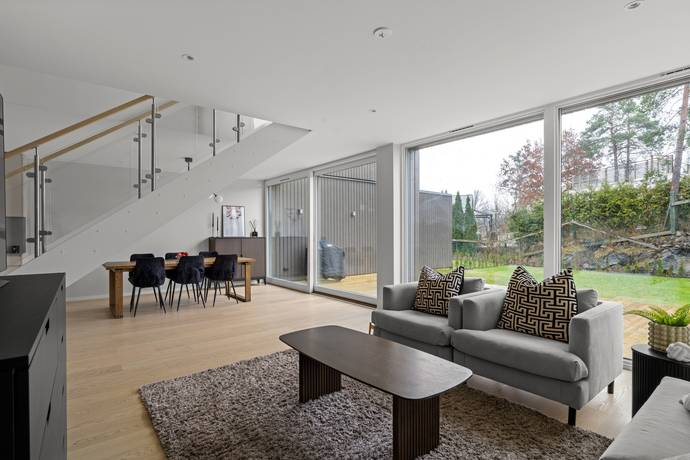

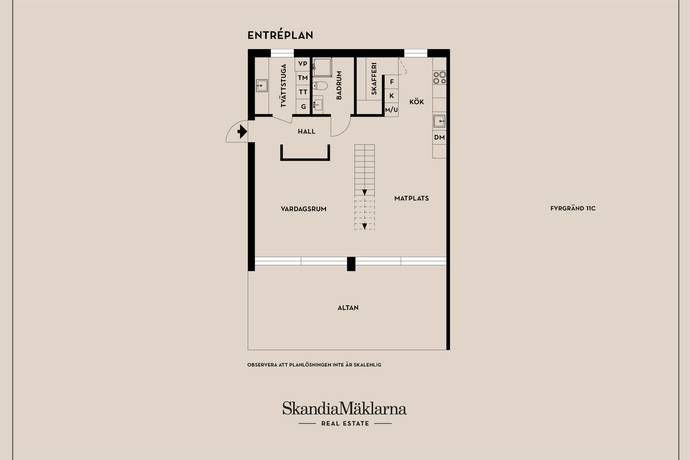

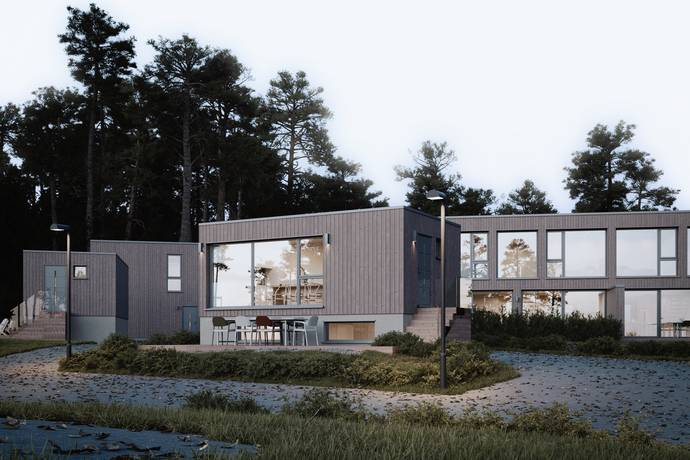

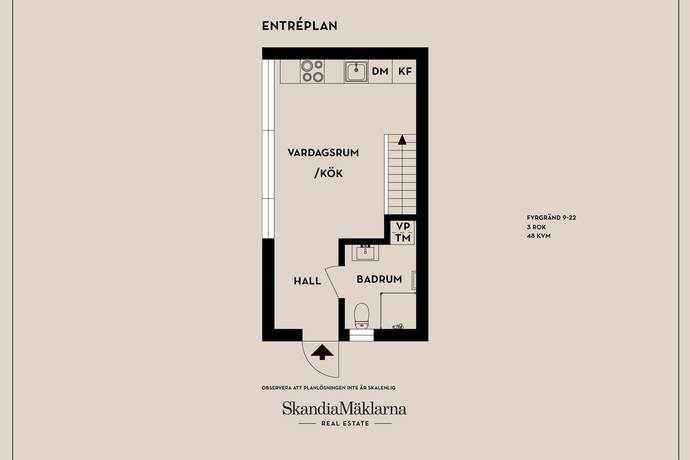

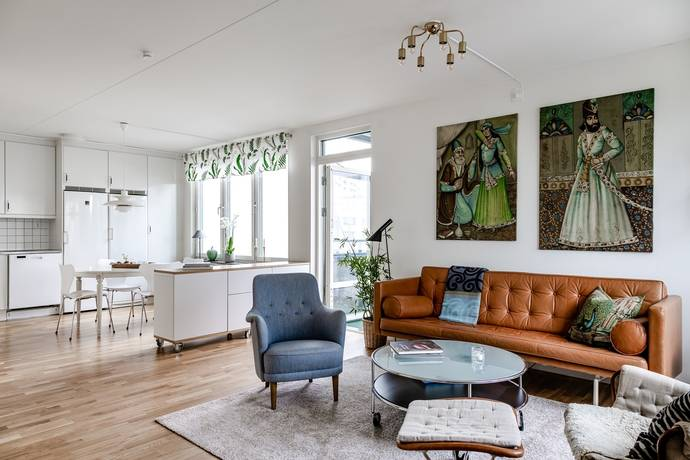

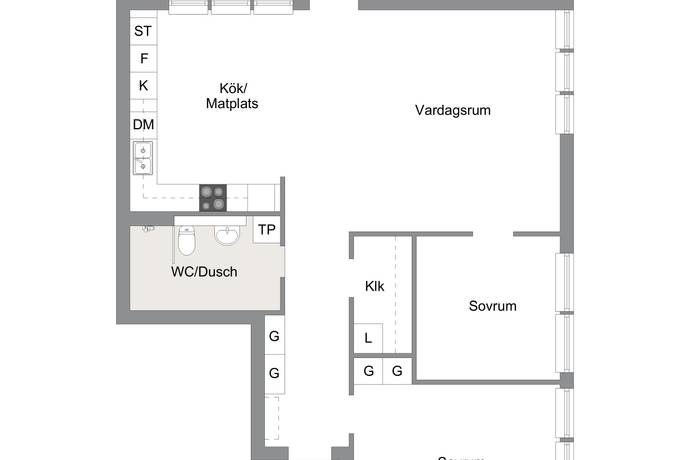

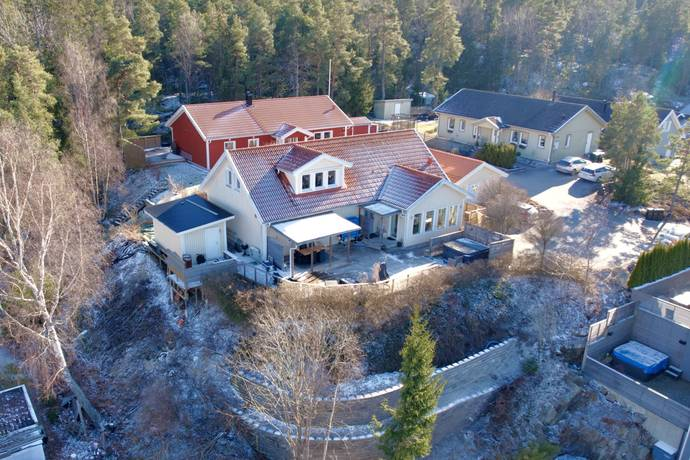

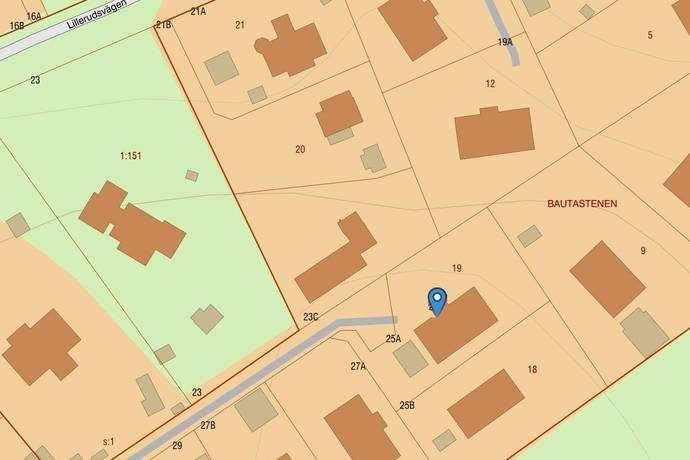

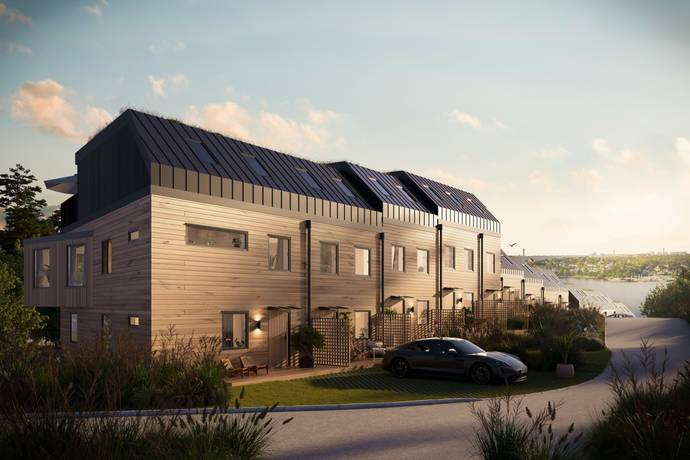

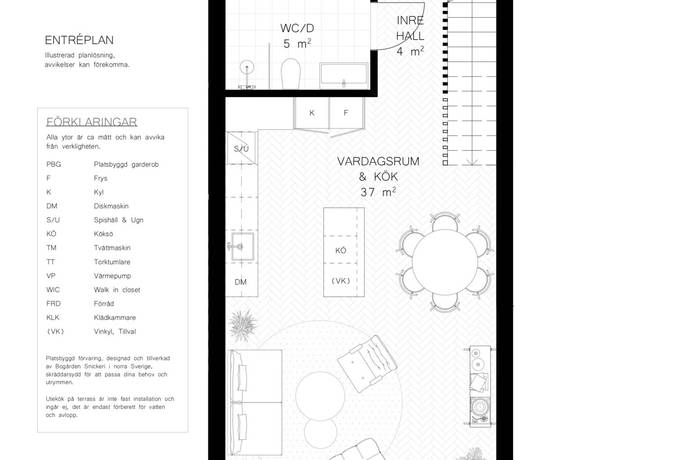

In [9]:
import io
import pandas as pd
from sqlalchemy import create_engine
from PIL import Image
from IPython.display import display

engine = create_engine(os.environ["DATABASE_URL"])
df = pd.read_sql_query(
    "SELECT hemnet_id, main_image_bytes, floorplan_image_bytes "
    "FROM hemnet_items WHERE main_image_bytes IS NOT NULL LIMIT 5",
    engine,
)

for _, row in df.iterrows():
    if row.main_image_bytes:
        display(Image.open(io.BytesIO(row.main_image_bytes)))
    if row.floorplan_image_bytes:
        display(Image.open(io.BytesIO(row.floorplan_image_bytes)))


In [11]:
print(df.columns)

Index(['hemnet_id', 'main_image_bytes', 'floorplan_image_bytes'], dtype='object')
